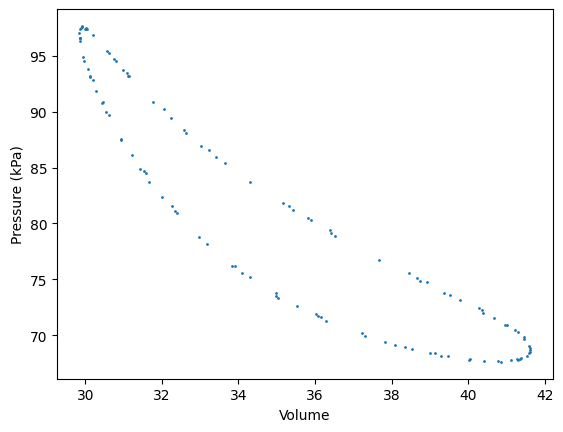

In [16]:
# Load data in dfs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

df_1 = pd.read_csv("EDPH20250207_115551.csv", header=0, 
                   names=["time", "angle", "volume", "pressure","temp1", "temp2"])

time = df_1["time"] # ms
radians = df_1["angle"]
volume = df_1["volume"]
pressure = df_1["pressure"] # kPa
temp1 = df_1["temp1"] # C
temp2 = df_1["temp2"] # C

plt.scatter(volume, pressure, s=1)
plt.xlabel("Volume")
plt.ylabel("Pressure (kPa)")
plt.show()

In [29]:
R = 8.314

# kPa -> Pa
max_pressure = max(pressure) * 1000
min_pressure = min(pressure) * 1000

max_index = pressure.idxmax()
min_index = pressure.idxmin()

# Assuming original value in cm^3
vol_at_max_pressure = volume.loc[max_index] / 1000
vol_at_min_pressure = volume.loc[min_index] / 1000

# C -> K
temp1_at_max_pressure = temp1.loc[max_index] + 273.15
temp1_at_min_pressure = temp1.loc[min_index] + 273.15

n1_max = (max_pressure * vol_at_max_pressure) / (R * temp1_at_max_pressure)
n1_min = (min_pressure * vol_at_min_pressure) / (R * temp1_at_min_pressure)

temp2_at_max_pressure = temp2.loc[max_index] + 273.15
temp2_at_min_pressure = temp2.loc[min_index] + 273.15

n2_max = (max_pressure * vol_at_max_pressure) / (R * temp2_at_max_pressure)
n2_min = (min_pressure * vol_at_min_pressure) / (R * temp2_at_min_pressure)

avg_n = (n1_max + n1_min + n2_max + n2_min)/4

print(f'Max pressure: {max_pressure:.2f} Pa, Volume: {vol_at_max_pressure:.2e}')
print(f"Temp1: {temp1_at_max_pressure:.2f} K, n1: {n1_max:.2f}")
print(f"Temp2: {temp2_at_max_pressure:.2f} K, n2: {n2_max:.2f}")
print(f'Min pressure: {min_pressure:.2f} Pa, Volume: {vol_at_min_pressure:.2e}')
print(f"Temp1: {temp1_at_min_pressure:.2f} K, n1: {n1_min:.2f}")
print(f"Temp2: {temp2_at_min_pressure:.2f} K, n2: {n2_min:.2f}")
print(f"\nAverage n value: {avg_n:.2f}")

Max pressure: 97663.57 Pa, Volume: 2.99e-02
Temp1: 454.90 K, n1: 0.77
Temp2: 313.40 K, n2: 1.12
Min pressure: 67622.07 Pa, Volume: 4.09e-02
Temp1: 455.40 K, n1: 0.73
Temp2: 313.15 K, n2: 1.06

Average n value: 0.92
